#Phân tích dữ liệu đã làm sạch


In [249]:
%pip install seaborn wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Data/Data_Final.csv')
df.info()

Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             248 non-null    object
 1   id_post          248 non-null    object
 2   created_time     248 non-null    object
 3   message          248 non-null    object
 4   type             248 non-null    object
 5   picture          248 non-null    object
 6   like             248 non-null    int64 
 7   love             248 non-null    int64 
 8   haha             248 non-null    int64 
 9   wow              248 non-null    int64 
 10  sad              248 non-null    int64 
 11  angry            248 non-null    int64 
 12  comments         248 non-null    object
 13  total_reactions  248 non-null    int64 
 14  total_shares     248 non-null    int64 
 15  total_comments   248 non-null    int64 
dtypes: int64(9), o

In [60]:
df.describe()

,like,love,haha,wow,sad,angry,total_reactions,total_shares,total_comments
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,2289.104839,28.241935,1802.483871,9.056452,124.741935,0.423387,4254.052419,96.201613,311.806452
std,1718.978782,139.722534,1688.099919,42.086339,264.442485,1.311031,3216.384195,232.470641,413.880700
min,252.000000,0.000000,49.000000,0.000000,0.000000,0.000000,448.000000,0.000000,10.000000
25%,1208.500000,4.000000,647.500000,1.000000,14.000000,0.000000,2198.750000,17.000000,73.500000
50%,1864.000000,7.000000,1159.000000,2.000000,40.000000,0.000000,3254.000000,40.500000,168.000000
75%,2832.000000,12.250000,2292.250000,5.000000,125.750000,0.000000,5176.500000,89.250000,367.250000
max,12215.000000,1937.000000,9642.000000,403.000000,2501.000000,16.000000,20379.000000,3095.000000,2902.000000


In [172]:
#Bài viết có số lượt tương tác lớn nhất
df['tuong_tac'] = df['total_comments'] + df['total_reactions'] + df['total_shares']
df_sorted = df.sort_values(by='tuong_tac', ascending=False)
most_interacted_post = df_sorted.iloc[0]
most_interacted_post

name                                              Biết thế éo đi làm
id_post                              101084031778928_858034806328828
created_time                                2023-08-29T01:50:26+0000
message            Có một vạn hành tinh nhưng tôi lại sinh ra ở h...
type                                                           photo
picture            https://scontent.fhan3-3.fna.fbcdn.net/v/t39.3...
like                                                            8185
love                                                              35
haha                                                            9642
wow                                                               14
sad                                                             2501
angry                                                              2
comments           [{'created_time': '2023-08-29T01:51:05+0000', ...
total_reactions                                                20379
total_shares                      

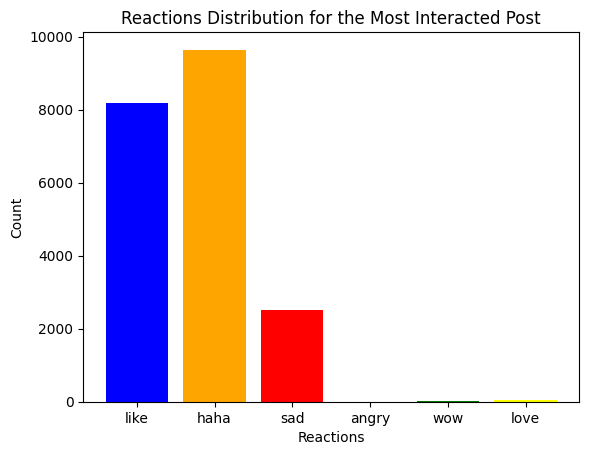

In [62]:
reactions = ['like', 'haha', 'sad','angry','wow', 'love']
counts = [most_interacted_post[reaction] for reaction in reactions]

# Plotting
plt.bar(reactions, counts, color=['blue', 'orange', 'red', 'black', 'green', 'yellow'])
plt.title('Reactions Distribution for the Most Interacted Post')
plt.xlabel('Reactions')
plt.ylabel('Count')
plt.show()

In [63]:
df_sorted = df.sort_values(by='tuong_tac', ascending=True)
least_interacted_post = df_sorted.iloc[0]
least_interacted_post

name                                              Biết thế éo đi làm
id_post                              101084031778928_867326945399614
created_time                                2023-09-11T14:04:46+0000
message            Khi sếp nói tôi đi làm suốt ngày cười #BTEDL #...
type                                                           video
picture            https://scontent.fhan4-1.fna.fbcdn.net/v/t15.5...
like                                                             252
love                                                               4
haha                                                             189
wow                                                                0
sad                                                                2
angry                                                              1
comments           [{'created_time': '2023-09-11T14:16:57+0000', ...
total_reactions                                                  448
total_shares                      

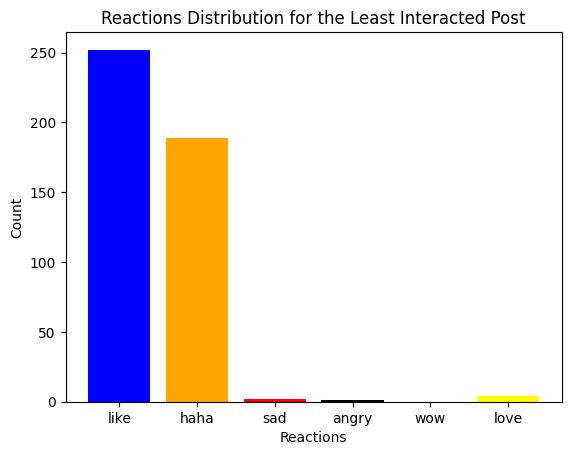

In [64]:
reactions = ['like', 'haha', 'sad','angry','wow', 'love']
counts = [least_interacted_post[reaction] for reaction in reactions]

# Plotting
plt.bar(reactions, counts, color=['blue', 'orange', 'red', 'black', 'green', 'yellow'])
plt.title('Reactions Distribution for the Least Interacted Post')
plt.xlabel('Reactions')
plt.ylabel('Count')
plt.show()

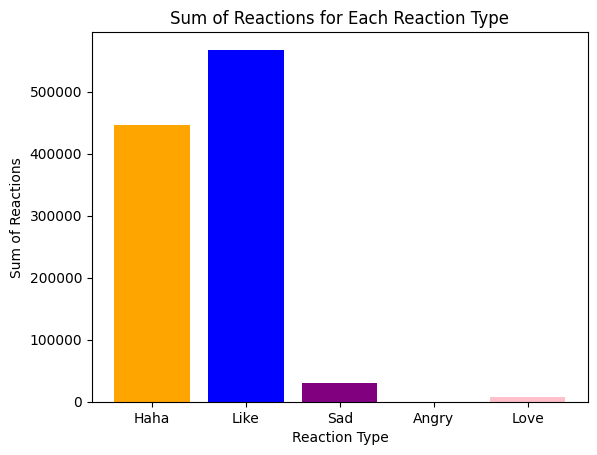

In [65]:
haha = df['haha'].sum()
like = df['like'].sum()
sad = df['sad'].sum()
angry = df['angry'].sum()
love = df['love'].sum()
reaction_types = ['Haha', 'Like', 'Sad', 'Angry', 'Love']
reaction_sums = [haha, like, sad, angry, love]

plt.bar(reaction_types, reaction_sums, color=['orange', 'blue', 'purple', 'red', 'pink'])
plt.title('Sum of Reactions for Each Reaction Type')
plt.xlabel('Reaction Type')
plt.ylabel('Sum of Reactions')
plt.show()

Text(0, 0.5, 'Posts')

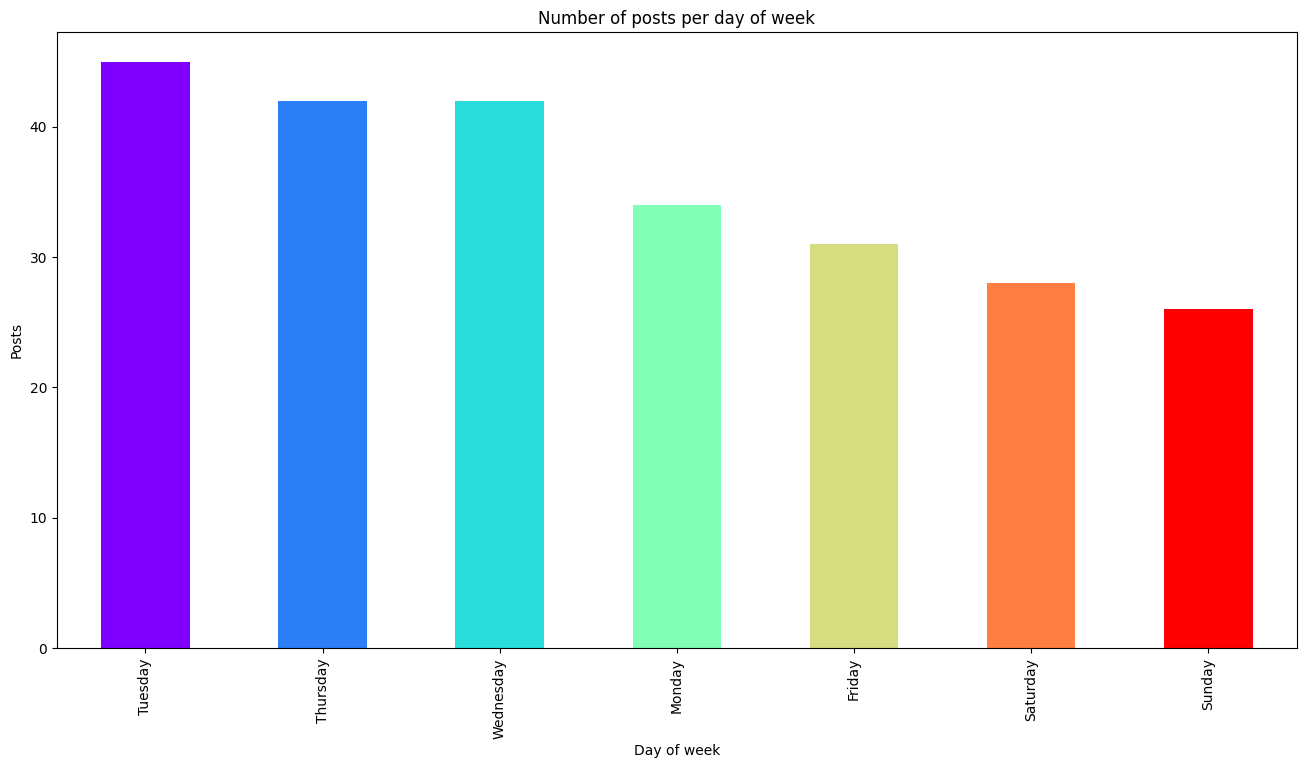

In [66]:
df['created_time'] = pd.to_datetime(df['created_time'])
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['week_day'] = df['created_time'].apply(lambda x: week_day[x.weekday()])

colors = cm.rainbow(np.linspace(0, 1, len(df['week_day'].unique())))
df['week_day'].value_counts().plot(kind='bar', figsize=(16,8), color=colors)
plt.title('Number of posts per day of week')
plt.xlabel('Day of week')
plt.ylabel('Posts')

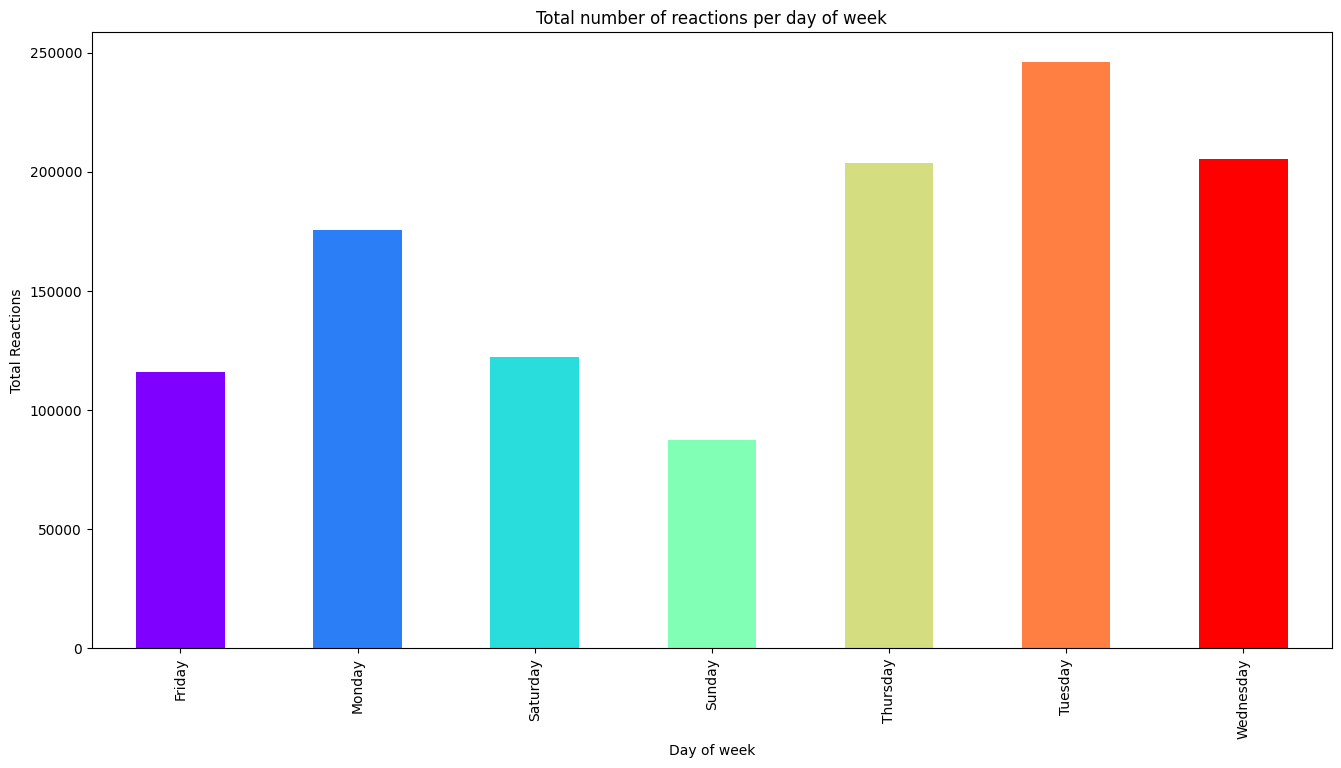

In [70]:
grouped_data = df.groupby('week_day')['tuong_tac'].sum()

# Plotting
colors = cm.rainbow(np.linspace(0, 1, len(grouped_data)))
grouped_data.plot(kind='bar', color=colors, figsize=(16, 8))
plt.title('Total number of reactions per day of week')
plt.xlabel('Day of week')
plt.ylabel('Total Reactions')
plt.show()

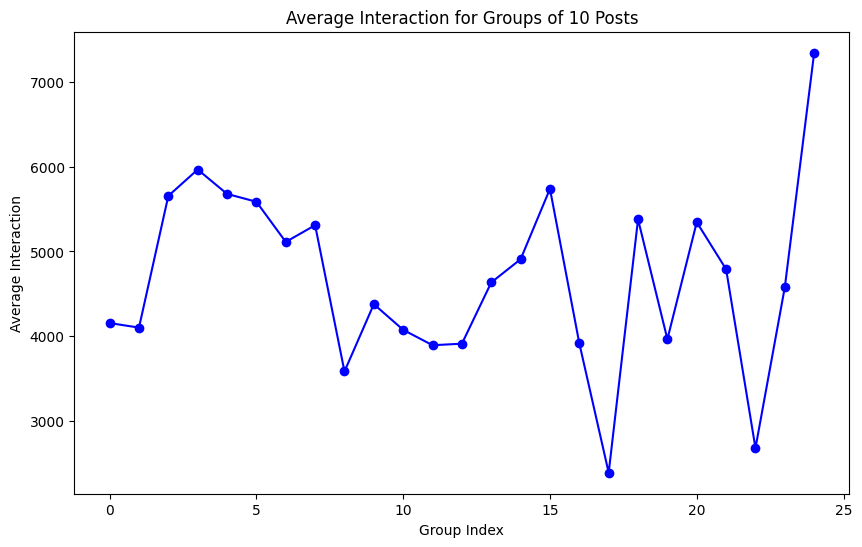

In [75]:
df = df.sort_values(by='created_time')

grouped_data = df.groupby(df.index // 10)['tuong_tac'].mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data, marker='o', linestyle='-', color='b')
plt.title('Average Interaction for Groups of 10 Posts')
plt.xlabel('Group Index')
plt.ylabel('Average Interaction')
plt.show()


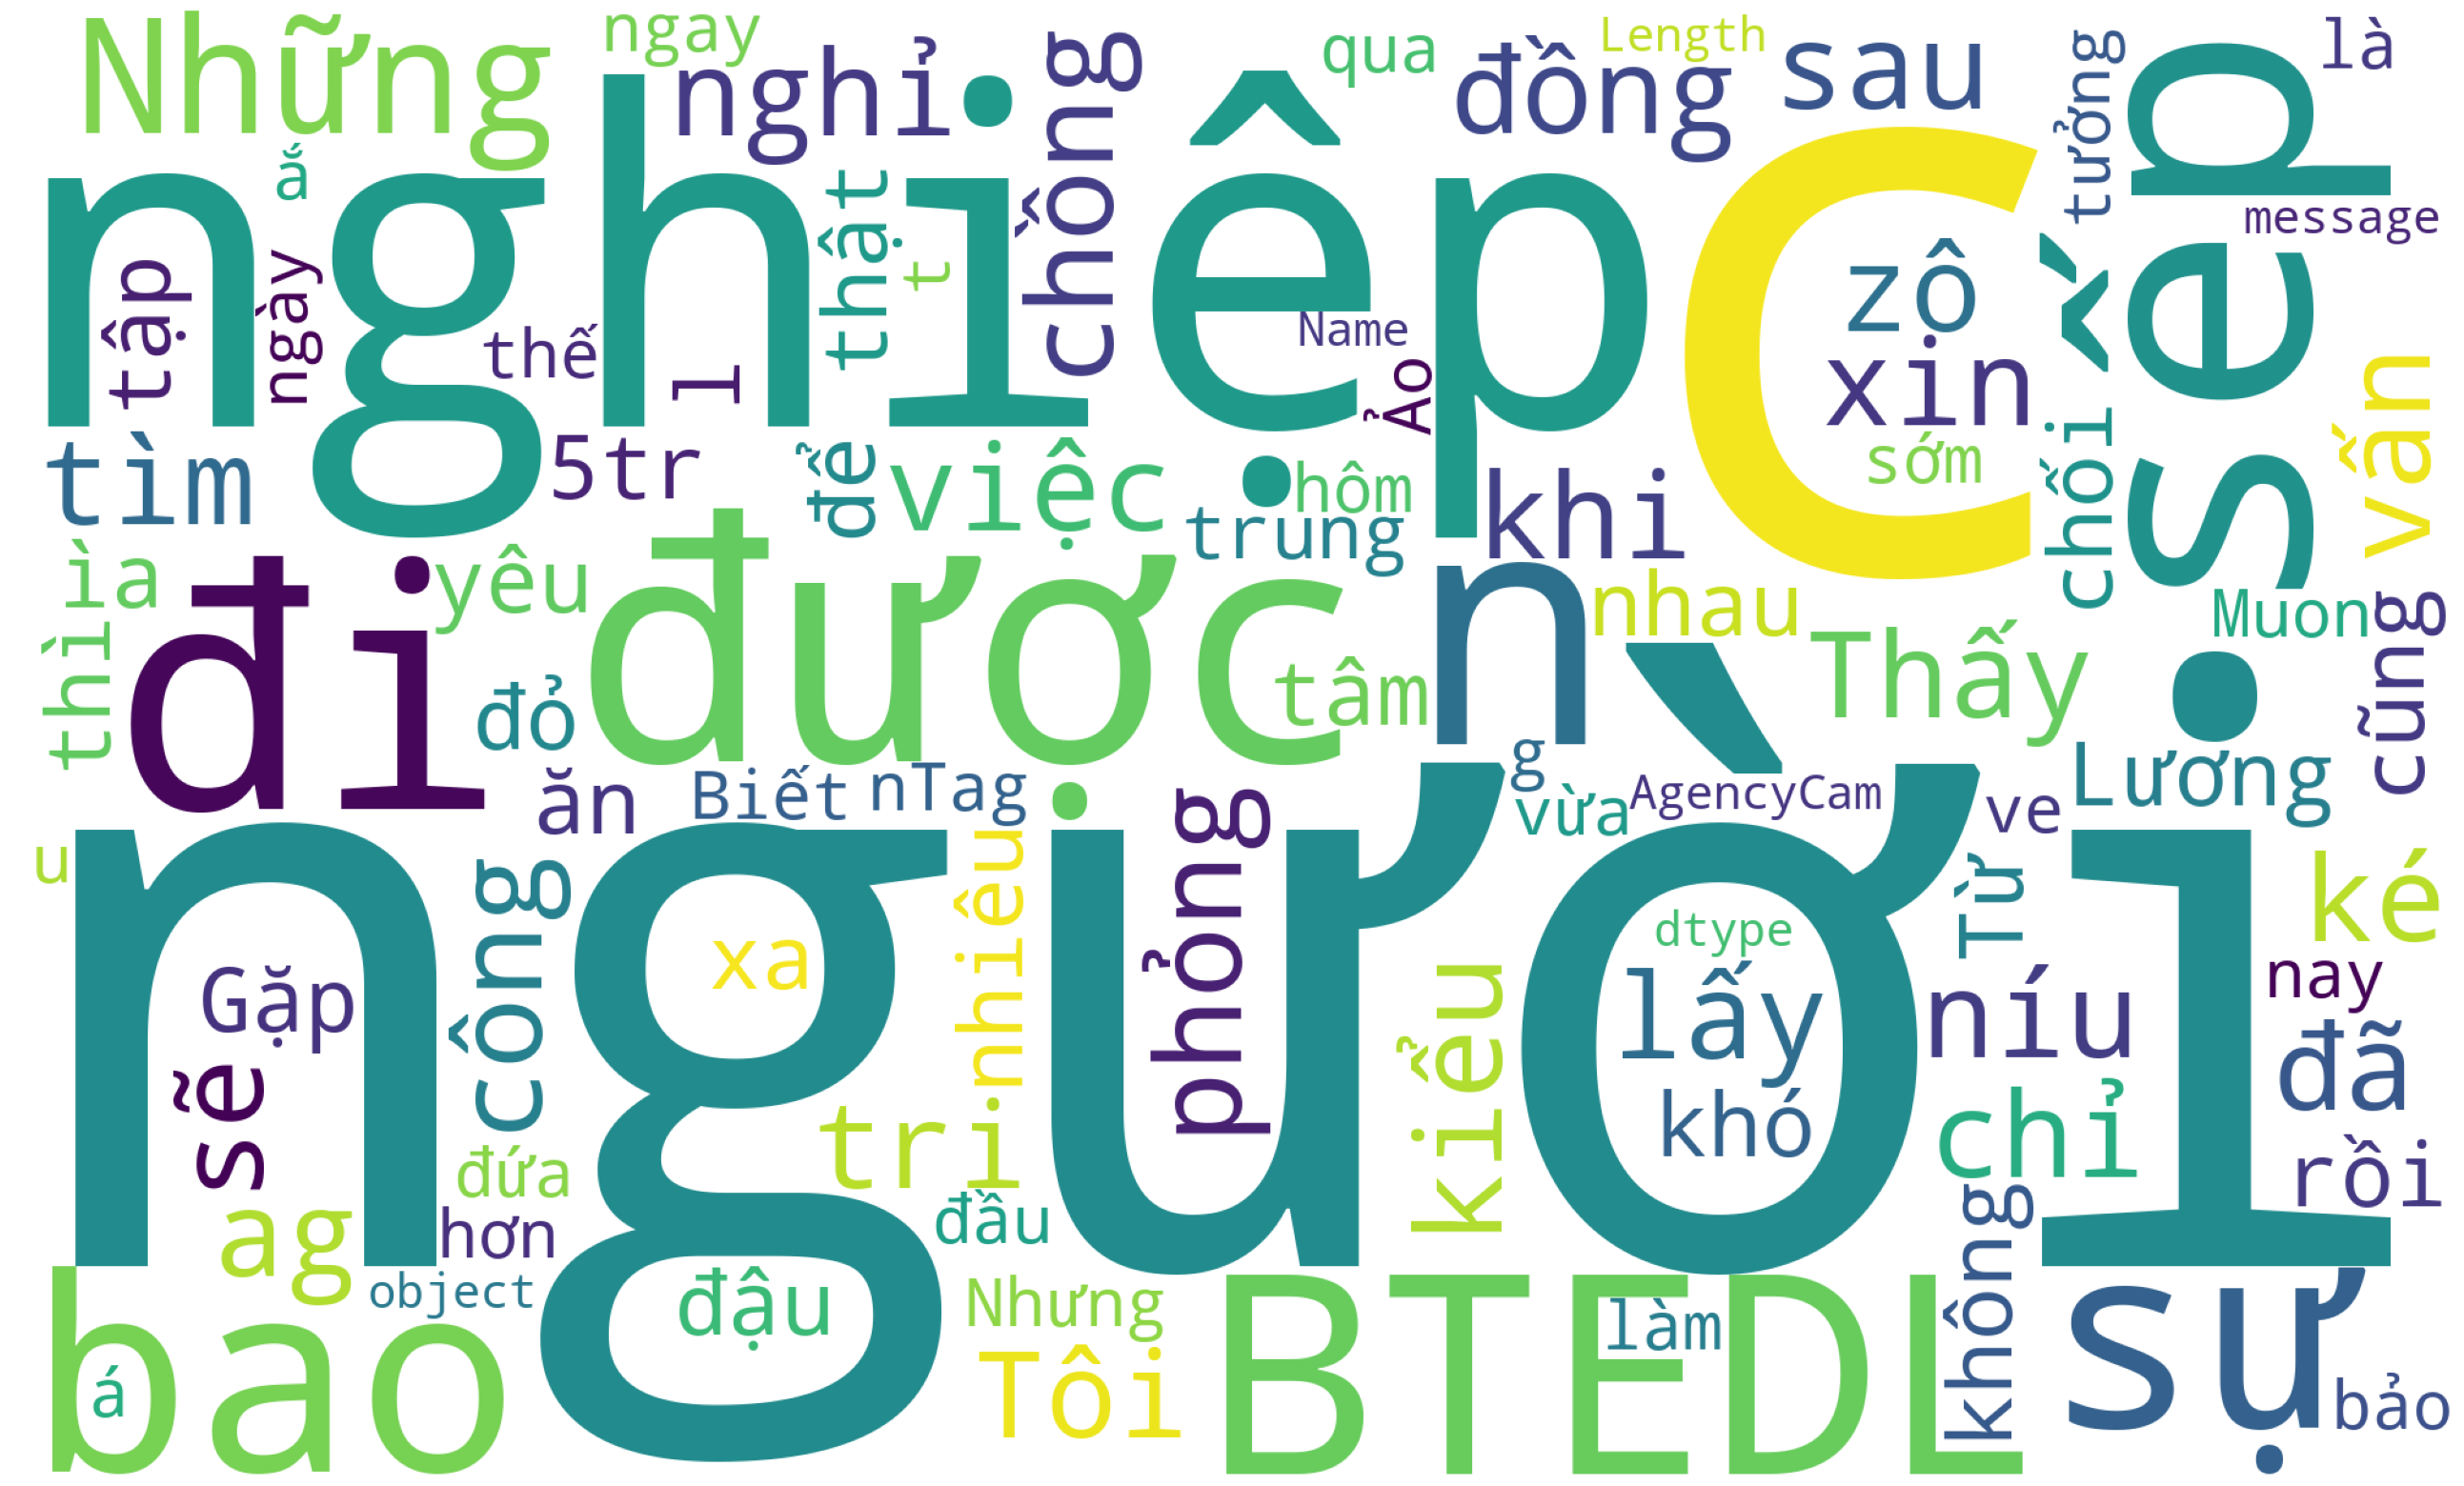

In [76]:
full_post_text = str(df['message'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(full_post_text)

plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

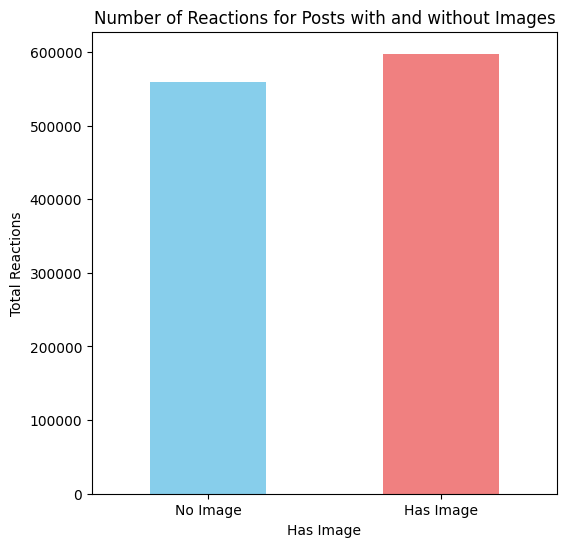

In [173]:
df['has_image'] = df['picture'].apply(lambda x: 1 if pd.notna(x) and x != ' ' else 0)

# Group by 'has_image' and calculate the sum of reactions for each group
grouped_data = df.groupby('has_image')['tuong_tac'].sum()

# Plotting
plt.figure(figsize=(6, 6))
grouped_data.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Number of Reactions for Posts with and without Images')
plt.xlabel('Has Image')
plt.ylabel('Total Reactions')
plt.xticks([0, 1], ['No Image', 'Has Image'], rotation=0)
plt.show()

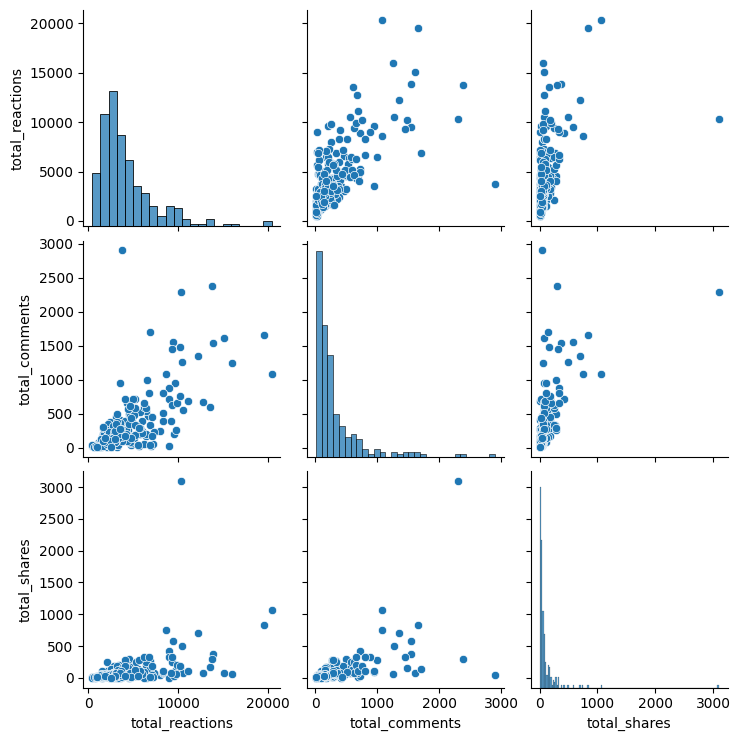

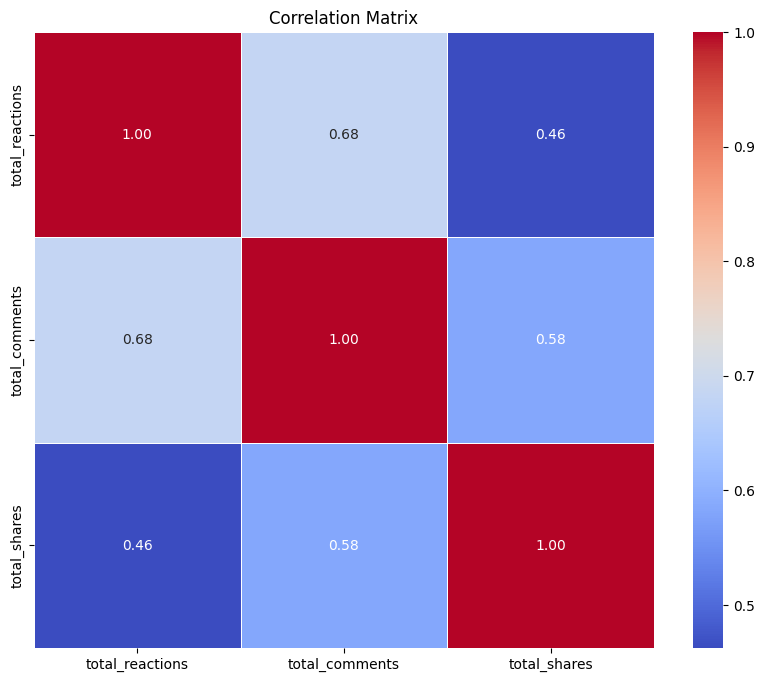

In [91]:
#Sự tương quan giữa số lượng reactions và số lượng bình luận và share
columns_to_analyze = ['total_reactions', 'total_comments', 'total_shares']

# Subset the DataFrame with the selected columns
subset_df = df[columns_to_analyze]

# Calculate correlation matrix
correlation_matrix = subset_df.corr()

# Plot scatter plots for selected columns
sns.pairplot(subset_df)
plt.show()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 247 to 0
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   name             248 non-null    object             
 1   id_post          248 non-null    object             
 2   created_time     248 non-null    datetime64[ns, UTC]
 3   message          248 non-null    object             
 4   type             248 non-null    object             
 5   picture          248 non-null    object             
 6   like             248 non-null    int64              
 7   love             248 non-null    int64              
 8   haha             248 non-null    int64              
 9   wow              248 non-null    int64              
 10  sad              248 non-null    int64              
 11  angry            248 non-null    int64              
 12  comments         248 non-null    object             
 13  total_reactions  248 non-

In [ ]:
#Giới tính của người tương tác
import json
def parse_json_safe(x):
    try:
        return json.loads(x) if pd.notna(x) else []
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return []

# Apply the parse_json_safe function to the 'comments' column
df['comments'] = df['comments'].apply(parse_json_safe)

# Extract gender information
df['gender'] = df['comments'].apply(lambda comments: [comment.get('from', {}).get('gender', None) for comment in comments])

# Filter out None values
df['gender'] = df['gender'].apply(lambda genders: [gender for gender in genders if gender is not None])

# Explode the list of genders to individual rows
gender_counts = df['gender'].explode().value_counts()

# Plotting
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title('Gender Distribution of Commenters')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [253]:

all_messages = [comment.get('message', None) for comments in df['comments'] for comment in comments]
all_messages
# Display all messages



['Nguyễn Thu Hiền',
 'Ngô Ngọc Quỳnh😀',
 'Thanh Thuỳ Nguyễn hâhhaaa',
 ':))',
 'Nhân viên tạp vụ belike :)))',
 'Thứ 2 t đi thử việc. Xem vid xong tự nhiên cơn lo lắng, hồi hộp nó ập đến. Khổ cái thân tôi',
 'Nhuộm tóc xong xinh gái hẳn',
 'Thanh Xuân giống k',
 'Chiếu mới :)))',
 'Mei Meii Nguyễn Thư :)))',
 'K còn gì để nói, vẫn như tên page=))',
 'chị Trang rapper đâu nhể',
 'Với hơn 6,5 tỷ lợi khuẩn 𝘓. 𝘱𝘢𝘳𝘢𝘤𝘢𝘴𝘦𝘪 Shirota trong mỗi chai Yakult, giúp cân bằng hệ vi sinh, ngăn ngừa các bệnh liên quan đến đường ruột và hỗ trợ tăng cường miễn dịch. Cứ yên tâm mà uống ực ực mỗi ngày để nâng cao sức khỏe nhé các tình yêu 😘',
 'Cứ như thấy cả công ty trong cái clip này =)) https://www.facebook.com/watch/289134847766221/839557291094136/',
 'Ẻ mượt mới cống hiến tốt dc',
 'yakult nè Đặng Quang Huy Anh',
 'Huệ Chi đỉnh lun í',
 'Nguyễn Hiếu Minh Tuệ lại còn ngon',
 'Thái Vy Nguyễn Nga',
 'Ở đâu có sếp tốt v ạ',
 'Quá đã',
 'Nhi Vân đề xuất cho sếp coi liền',
 'Hoàng Đoàn',
 'ui ai mua tui',
 '

Note: you may need to restart the kernel to use updated packages.
Message: Nguyễn Thu Hiền, Sentiment: Neutral
Message: Ngô Ngọc Quỳnh😀, Sentiment: Positive
Message: Thanh Thuỳ Nguyễn hâhhaaa, Sentiment: Neutral
Message: :)), Sentiment: Neutral
Message: Nhân viên tạp vụ belike :))), Sentiment: Neutral
Message: Thứ 2 t đi thử việc. Xem vid xong tự nhiên cơn lo lắng, hồi hộp nó ập đến. Khổ cái thân tôi, Sentiment: Neutral
Message: Nhuộm tóc xong xinh gái hẳn, Sentiment: Neutral
Message: Thanh Xuân giống k, Sentiment: Neutral
Message: Chiếu mới :))), Sentiment: Neutral
Message: Mei Meii Nguyễn Thư :))), Sentiment: Neutral
Message: K còn gì để nói, vẫn như tên page=)), Sentiment: Neutral
Message: chị Trang rapper đâu nhể, Sentiment: Neutral
Message: Với hơn 6,5 tỷ lợi khuẩn 𝘓. 𝘱𝘢𝘳𝘢𝘤𝘢𝘴𝘦𝘪 Shirota trong mỗi chai Yakult, giúp cân bằng hệ vi sinh, ngăn ngừa các bệnh liên quan đến đường ruột và hỗ trợ tăng cường miễn dịch. Cứ yên tâm mà uống ực ực mỗi ngày để nâng cao sức khỏe nhé các tình yêu 😘

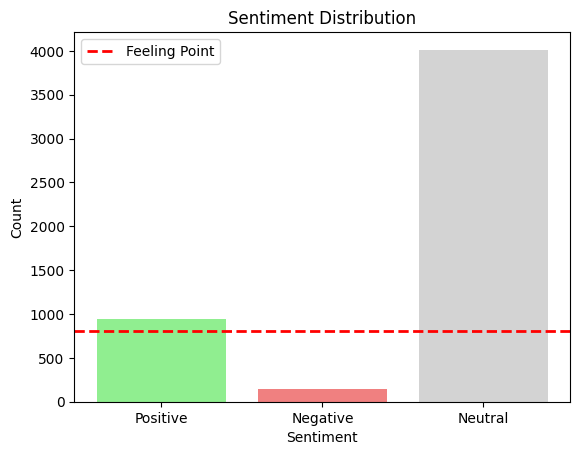

In [272]:
%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Predict sentiment for each message
sentiments = [analyzer.polarity_scores(message)['compound'] for message in all_messages]

# Classify sentiments as positive, negative, or neutral
classified_sentiments = ['Positive' if score >= 0.05 else 'Negative' if score <= -0.05 else 'Neutral' for score in sentiments]

# Display the results
negative = 0
positive = 0
neutral = 0
for message, sentiment in zip(all_messages, classified_sentiments):
    if sentiment == 'Negative':
        negative+=1
    if sentiment == 'Positive':
        positive+=1
    if sentiment == 'Neutral':
        neutral+=1
    print(f"Message: {message}, Sentiment: {sentiment}")

labels = ['Positive', 'Negative', 'Neutral']
counts = [positive, negative, neutral]
feeling_point = positive - negative
plt.bar(labels, counts, color=['lightgreen', 'lightcoral', 'lightgrey'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.axhline(feeling_point, color='red', linestyle='dashed', linewidth=2, label='Feeling Point')

plt.legend()
plt.show()